## Missing Case Analysis - 

This technique assumes that data points are missing at random, and it is suitable for both the categorical and numerical variables. In this technique, we drop the missing values while making sure that the distribution of that column remains the same. If the distribution changes after excluding the data, then this is a sign that we shouldn't be doing it.

Advantages :

1. This technique is easy to implement and quite fast.
2. This technique doesn't require any data manipulation.
3. One of the best things about this technique is that it maintains the distribution of the variables, thus, keeping the statistical properties intact to a certain extent.

Dis-Advantage:

1. If data contains too many missing instances, then this technique cannot be applied because that will lead to loss of information.
2. This analysis can create a biased dataset since dropping values may cause an increase in the percentage of other instances of categorical data.


Here we check if the distribution of the dropped column changes before or after dropping the values or not. ( using histogram or bar plots)


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/adiag321/Data-Science-datasets/main/House%20Price%20train.csv")

In [3]:
#checking the data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# storing variables those variables which has missing values 

var_na =[]

for var in data.columns:
    if data[var].isnull().sum()>0:
        var_na.append(var)

In [25]:
#printing % of missing values in the columns 
data[var_na].isnull().sum()*100/len(data)

# data[var_na].isnull().sum()*100/data.shape[1]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
# Storing those variables which have missing values less than 5 %
var_cca = [var for var in data.columns if data[var].isnull().mean() < 0.05]

In [7]:
#creating dataset for complete case analysis 

data_cca = data[var_cca].dropna()
data.shape, data_cca.shape

((1460, 81), (1412, 70))

In [8]:
def plot_dist_change(data, data_cca, var,figsize):
    #setting the figure size for our distrbution 
    fig = plt.figure(figsize=figsize)
    
    
    ax = fig.add_subplot(131) #defining where we want our plot 
    data[var].hist(bins=50, ax=ax, color='orange',alpha=1,label="Before_dropping")#plotting distribution
    plt.title(var)
    plt.legend() # getting the legends 
    
    ax = fig.add_subplot(132)
    data_cca[var].hist(bins=50, ax=ax, color='green',  alpha=0.8, label="After_dropping")
    plt.title(var)
    plt.legend()

    
    ax = fig.add_subplot(133)
    data[var].hist(bins=50, ax=ax, color='orange',alpha=1,label="Befor_dropping")
    data_cca[var].hist(bins=50, ax=ax, color='green',  alpha=0.8,label="After_dropping")
    plt.title("Distribution change")
    plt.legend()

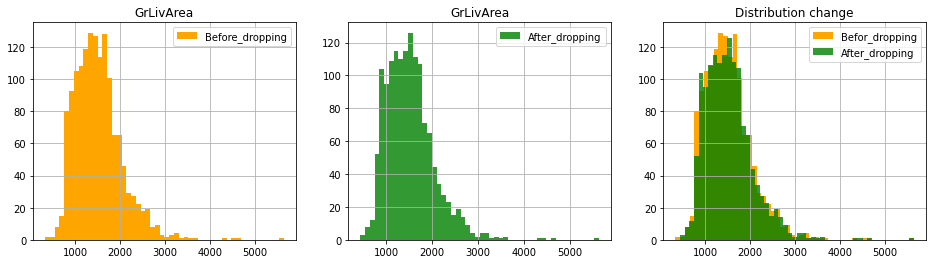

In [9]:
# plotting for variable GrLivArea
plot_dist_change(data=data,data_cca=data_cca,var="GrLivArea",figsize=(16,4))

In [10]:

def plot_dist_change_cat(data, data_cca, var,figsize):
    
    """
    This Function plots 2 graph
    1st- distribution before dropping missing values
    2nd- dsitribution after dropping missing values
    
    """
    
    #setting the figure size for our distrbution 
    fig = plt.figure(figsize=figsize)
    
    ax = fig.add_subplot(121) #defining where we ant our plot 
    graph = sns.countplot(ax=ax,x=var, data=data)
    plt.title("Before Complete Case Analysis")
    
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=15)
        
        
    
    ax = fig.add_subplot(122)
    graph = sns.countplot(ax=ax,x=var, data=data_cca)
    plt.title("After Complete Case Analysis")
    
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=15)


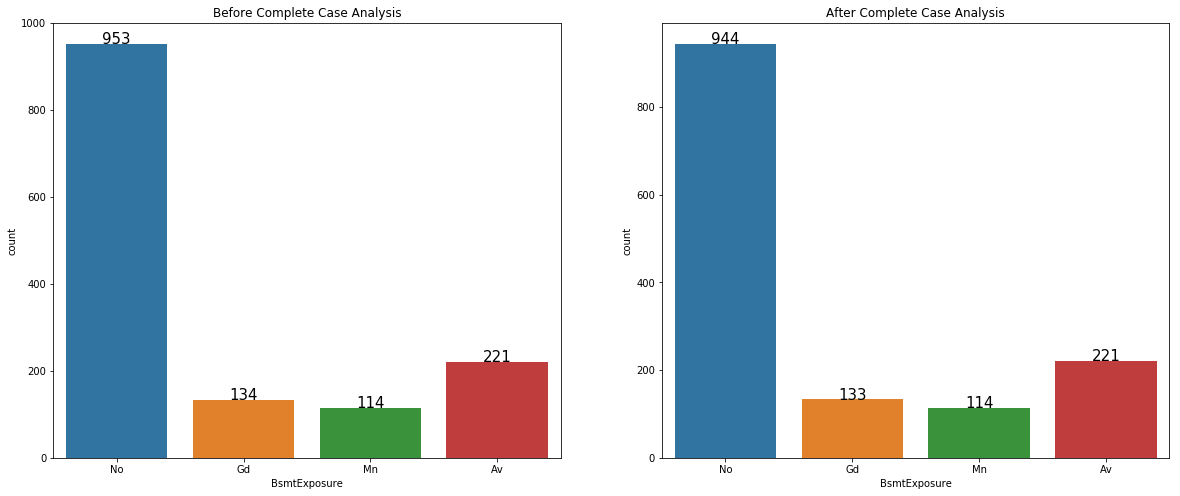

In [119]:
#Plotting the Basement variables
plot_dist_change_cat(data, data_cca, "BsmtExposure", (20,8))